#Tratamiento de DataFrames

Promedio diario entre estaciones + fecha en Año/Mes/Día

In [10]:
import pandas as pd
import numpy as np

In [12]:
# DataFrame - 2023
PATH = "Dataset-2023.csv"

# Leer CSV
df = pd.read_csv(PATH)
df.columns = [c.strip() for c in df.columns]

# Detectar columna de fecha
date_candidates = [c for c in df.columns if c.lower() in {"date", "fecha"}]
if not date_candidates:
    raise ValueError("No se encontró columna de fecha (Date/Fecha). Verifica el CSV.")
DATE_COL = date_candidates[0]
df[DATE_COL] = pd.to_datetime(df[DATE_COL], errors="coerce")

# Asegurar métricas
col_aqi = "Daily AQI Value"
col_co  = "Daily Max 8-hour CO Concentration"
col_obs = "Daily Obs Count"  # puede no existir en algunos archivos

missing = [c for c in [col_aqi, col_co] if c not in df.columns]
if missing:
    raise ValueError(f"Faltan columnas requeridas: {missing}. Revisa el CSV.")

# Convertir a numérico (por si vienen como texto)
df[col_aqi] = pd.to_numeric(df[col_aqi], errors="coerce")
df[col_co]  = pd.to_numeric(df[col_co], errors="coerce")
if col_obs in df.columns:
    df[col_obs] = pd.to_numeric(df[col_obs], errors="coerce")

# Promedio diario entre estaciones
agg_dict = {
    col_aqi: "mean",
    col_co: "mean",
}
if col_obs in df.columns:
    # Suma total de observaciones del día (todas las estaciones)
    agg_dict[col_obs] = "sum"
    # Si prefieres el promedio por estación en vez de la suma, usa:
    # agg_dict[col_obs] = "mean"

daily = (
    df.groupby(DATE_COL, dropna=True)
      .agg(agg_dict)
      .reset_index()
      .rename(columns={
          col_aqi: "AQI_mean",
          col_co:  "CO_mean",
          col_obs: "ObsCount_total" if col_obs in agg_dict and agg_dict[col_obs] == "sum" else "ObsCount_mean"
      })
      .sort_values(DATE_COL)
)

# Separar fecha en Año / Mes / Día
daily["Year"]  = daily[DATE_COL].dt.year
daily["Month"] = daily[DATE_COL].dt.month
daily["Day"]   = daily[DATE_COL].dt.day

# Dejar SOLO las columnas pedidas
cols_out = ["Year", "Month", "Day", "AQI_mean", "CO_mean"]
if col_obs in df.columns:
    # Mantener la columna agregada de obs count
    last_obs_col = "ObsCount_total" if "ObsCount_total" in daily.columns else "ObsCount_mean"
    cols_out.append(last_obs_col)

final = daily[cols_out].copy()

# Guardar
out_path = "promedio_diario_2023.csv"
final.to_csv(out_path, index=False)

print("✔ Archivo generado:", out_path)
print(final.head(10))

✔ Archivo generado: promedio_diario_2023.csv
   Year  Month  Day  AQI_mean   CO_mean  ObsCount_total
0  2023      1    1  3.551020  0.316327             889
1  2023      1    2  4.877551  0.414286            1166
2  2023      1    3  3.882353  0.347059            1142
3  2023      1    4  3.960000  0.346000            1176
4  2023      1    5  3.920000  0.346000            1148
5  2023      1    6  5.591837  0.485714            1151
6  2023      1    7  6.019608  0.529412            1199
7  2023      1    8  5.705882  0.515686            1188
8  2023      1    9  5.450980  0.468627            1164
9  2023      1   10  4.411765  0.380392            1147


In [13]:
# DataFrame 2024
PATH = "Dataset-2024.csv"

# Leer CSV
df = pd.read_csv(PATH)
df.columns = [c.strip() for c in df.columns]

# Detectar columna de fecha
date_candidates = [c for c in df.columns if c.lower() in {"date", "fecha"}]
if not date_candidates:
    raise ValueError("No se encontró columna de fecha (Date/Fecha). Verifica el CSV.")
DATE_COL = date_candidates[0]
df[DATE_COL] = pd.to_datetime(df[DATE_COL], errors="coerce")

# Asegurar métricas
col_aqi = "Daily AQI Value"
col_co  = "Daily Max 8-hour CO Concentration"
col_obs = "Daily Obs Count"  # puede no existir en algunos archivos

missing = [c for c in [col_aqi, col_co] if c not in df.columns]
if missing:
    raise ValueError(f"Faltan columnas requeridas: {missing}. Revisa el CSV.")

# Convertir a numérico (por si vienen como texto)
df[col_aqi] = pd.to_numeric(df[col_aqi], errors="coerce")
df[col_co]  = pd.to_numeric(df[col_co], errors="coerce")
if col_obs in df.columns:
    df[col_obs] = pd.to_numeric(df[col_obs], errors="coerce")

# Promedio diario entre estaciones
agg_dict = {
    col_aqi: "mean",
    col_co: "mean",
}
if col_obs in df.columns:
    # Suma total de observaciones del día (todas las estaciones)
    agg_dict[col_obs] = "sum"
    # Si prefieres el promedio por estación en vez de la suma, usa:
    # agg_dict[col_obs] = "mean"

daily = (
    df.groupby(DATE_COL, dropna=True)
      .agg(agg_dict)
      .reset_index()
      .rename(columns={
          col_aqi: "AQI_mean",
          col_co:  "CO_mean",
          col_obs: "ObsCount_total" if col_obs in agg_dict and agg_dict[col_obs] == "sum" else "ObsCount_mean"
      })
      .sort_values(DATE_COL)
)

# Separar fecha en Año / Mes / Día
daily["Year"]  = daily[DATE_COL].dt.year
daily["Month"] = daily[DATE_COL].dt.month
daily["Day"]   = daily[DATE_COL].dt.day

# Dejar SOLO las columnas pedidas
cols_out = ["Year", "Month", "Day", "AQI_mean", "CO_mean"]
if col_obs in df.columns:
    # Mantener la columna agregada de obs count
    last_obs_col = "ObsCount_total" if "ObsCount_total" in daily.columns else "ObsCount_mean"
    cols_out.append(last_obs_col)

final = daily[cols_out].copy()

# Guardar
out_path = "promedio_diario_2024.csv"
final.to_csv(out_path, index=False)

print("✔ Archivo generado:", out_path)
print(final.head(10))

✔ Archivo generado: promedio_diario_2024.csv
   Year  Month  Day  AQI_mean   CO_mean  ObsCount_total
0  2024      1    1  7.177778  0.626667             809
1  2024      1    2  7.020833  0.606250            1072
2  2024      1    3  5.770833  0.495833            1117
3  2024      1    4  6.229167  0.541667            1123
4  2024      1    5  7.395833  0.645833            1104
5  2024      1    6  7.354167  0.643750            1140
6  2024      1    7  4.833333  0.420833            1136
7  2024      1    8  6.104167  0.535417            1135
8  2024      1    9  6.937500  0.600000            1113
9  2024      1   10  6.500000  0.568750            1087


In [14]:
# DataFrame 2025 (Solo para comparación final)
PATH = "Dataset-2025.csv"

# Leer CSV
df = pd.read_csv(PATH)
df.columns = [c.strip() for c in df.columns]

# Detectar columna de fecha
date_candidates = [c for c in df.columns if c.lower() in {"date", "fecha"}]
if not date_candidates:
    raise ValueError("No se encontró columna de fecha (Date/Fecha). Verifica el CSV.")
DATE_COL = date_candidates[0]
df[DATE_COL] = pd.to_datetime(df[DATE_COL], errors="coerce")

# Asegurar métricas
col_aqi = "Daily AQI Value"
col_co  = "Daily Max 8-hour CO Concentration"
col_obs = "Daily Obs Count"  # puede no existir en algunos archivos

missing = [c for c in [col_aqi, col_co] if c not in df.columns]
if missing:
    raise ValueError(f"Faltan columnas requeridas: {missing}. Revisa el CSV.")

# Convertir a numérico (por si vienen como texto)
df[col_aqi] = pd.to_numeric(df[col_aqi], errors="coerce")
df[col_co]  = pd.to_numeric(df[col_co], errors="coerce")
if col_obs in df.columns:
    df[col_obs] = pd.to_numeric(df[col_obs], errors="coerce")

# Promedio diario entre estaciones
agg_dict = {
    col_aqi: "mean",
    col_co: "mean",
}
if col_obs in df.columns:
    # Suma total de observaciones del día (todas las estaciones)
    agg_dict[col_obs] = "sum"
    # Si prefieres el promedio por estación en vez de la suma, usa:
    # agg_dict[col_obs] = "mean"

daily = (
    df.groupby(DATE_COL, dropna=True)
      .agg(agg_dict)
      .reset_index()
      .rename(columns={
          col_aqi: "AQI_mean",
          col_co:  "CO_mean",
          col_obs: "ObsCount_total" if col_obs in agg_dict and agg_dict[col_obs] == "sum" else "ObsCount_mean"
      })
      .sort_values(DATE_COL)
)

# Separar fecha en Año / Mes / Día
daily["Year"]  = daily[DATE_COL].dt.year
daily["Month"] = daily[DATE_COL].dt.month
daily["Day"]   = daily[DATE_COL].dt.day

# Dejar SOLO las columnas pedidas
cols_out = ["Year", "Month", "Day", "AQI_mean", "CO_mean"]
if col_obs in df.columns:
    # Mantener la columna agregada de obs count
    last_obs_col = "ObsCount_total" if "ObsCount_total" in daily.columns else "ObsCount_mean"
    cols_out.append(last_obs_col)

final = daily[cols_out].copy()

# Guardar
out_path = "promedio_diario_2025.csv"
final.to_csv(out_path, index=False)

print("✔ Archivo generado:", out_path)
print(final.head(10))

✔ Archivo generado: promedio_diario_2025.csv
   Year  Month  Day   AQI_mean   CO_mean  ObsCount_total
0  2025      1    1  10.466667  0.920000             556
1  2025      1    2   9.766667  0.850000             691
2  2025      1    3   9.000000  0.789655             690
3  2025      1    4   6.733333  0.583333             707
4  2025      1    5   7.900000  0.696667             712
5  2025      1    6   8.066667  0.703333             690
6  2025      1    7   6.133333  0.540000             692
7  2025      1    8   6.033333  0.533333             668
8  2025      1    9   9.724138  0.868966             652
9  2025      1   10  11.241379  0.996552             681


Concatenar los DataFrame de 2023 y 2024 (ordenados por fecha)

In [15]:
PATH_23 = "promedio_diario_2023.csv"
PATH_24 = "promedio_diario_2024.csv"

df23 = pd.read_csv(PATH_23)
df24 = pd.read_csv(PATH_24)

# Unifica nombre de la columna de observaciones si existe
def normalize_obs(df):
    if "ObsCount_total" in df.columns and "ObsCount_mean" not in df.columns:
        df = df.rename(columns={"ObsCount_total": "ObsCount"})
    elif "ObsCount_mean" in df.columns and "ObsCount_total" not in df.columns:
        df = df.rename(columns={"ObsCount_mean": "ObsCount"})
    return df

df23 = normalize_obs(df23)
df24 = normalize_obs(df24)

# Define el orden base de columnas (ajusta si no tienes ObsCount)
base_cols = ["Year", "Month", "Day", "AQI_mean", "CO_mean"]
if "ObsCount" in df23.columns or "ObsCount" in df24.columns:
    base_cols.append("ObsCount")

# Asegura mismas columnas/orden en ambos
df23 = df23.reindex(columns=base_cols)
df24 = df24.reindex(columns=base_cols)

# Concatena dejando 2023 primero y 2024 después
combined = pd.concat([df23, df24], ignore_index=True)

# (Opcional) Orden cronológico por seguridad
combined = combined.sort_values(["Year", "Month", "Day"], ignore_index=True)

# (Opcional) Elimina duplicados por fecha si hubiera solapamientos
combined = combined.drop_duplicates(subset=["Year", "Month", "Day"], keep="first")

# Guarda
out_path = "promedio_diario_2023_2024.csv"
combined.to_csv(out_path, index=False)

print("✔ Archivo generado:", out_path)
print(combined.head())
print(combined.tail())

✔ Archivo generado: promedio_diario_2023_2024.csv
   Year  Month  Day  AQI_mean   CO_mean  ObsCount
0  2023      1    1  3.551020  0.316327       889
1  2023      1    2  4.877551  0.414286      1166
2  2023      1    3  3.882353  0.347059      1142
3  2023      1    4  3.960000  0.346000      1176
4  2023      1    5  3.920000  0.346000      1148
     Year  Month  Day  AQI_mean   CO_mean  ObsCount
726  2024     12   27  7.323529  0.644118       789
727  2024     12   28  7.500000  0.652941       810
728  2024     12   29  8.058824  0.700000       806
729  2024     12   30  6.441176  0.564706       796
730  2024     12   31  9.058824  0.794118       793


Eliminar una columna inecesaria (ObsCount)

In [16]:
combined = pd.read_csv("promedio_diario_2023_2024.csv")
if "ObsCount" in combined.columns:
    combined = combined.drop(columns=["ObsCount"])
combined.to_csv("promedio_diario_final.csv", index=False)
print("✔ Guardado sin ObsCount:", "promedio_diario_final.csv")

✔ Guardado sin ObsCount: promedio_diario_final.csv


#Tratamiento de Datos

**ML con features (lags + estacionalidad + exógenas)**
*   Entrena en 2023–2024 y pronostica 2025 (recursivo)

In [17]:
import matplotlib.pyplot as plt
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error as sk_mse, mean_absolute_error as sk_mae

CV (5 folds) RMSE: 0.404 ± 0.443 | MAE: 0.271
2025: RMSE 0.248 | MAE 0.172
✔ Guardado: AQI_forecast_2025_ML.csv


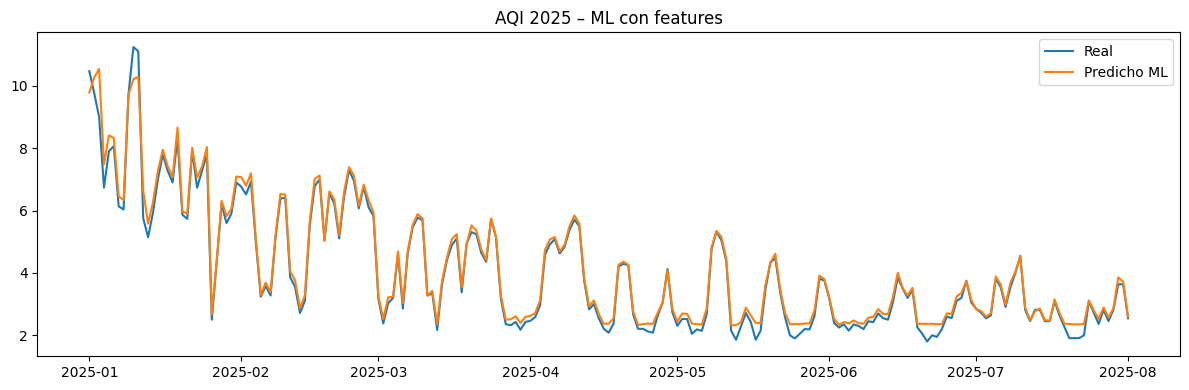

In [18]:
# ML con features (lags + estacionalidad + exógenas)

# Entrena en 2023–2024 y pronostica 2025 (recursivo)

DATA_2324 = "promedio_diario_2023_2024.csv"   # Year,Month,Day,AQI_mean,CO_mean,ObsCount_total
DATA_2025 = "promedio_diario_2025.csv"        # para evaluar 2025 si lo tenés

def load_df(path):
    df = pd.read_csv(path)
    df.columns = [c.strip() for c in df.columns]
    for c in ["Year","Month","Day"]:
        df[c] = df[c].astype(int)
    df["Date"] = pd.to_datetime(df[["Year","Month","Day"]], errors="coerce")
    df = df.sort_values("Date").reset_index(drop=True)
    # normalizar nombres esperados
    if "ObsCount_total" not in df.columns:
        # por compat: a veces se llama "ObsCount" o similar
        for alt in ["ObsCount", "ObsCount_sum", "ObsCountTotal"]:
            if alt in df.columns:
                df = df.rename(columns={alt:"ObsCount_total"})
                break
    return df

df = load_df(DATA_2324)

# features
def add_time_features(tmp):
    out = tmp.copy()
    # lags AQI
    for L in [1,2,3,7,14,28]:
        out[f"AQI_lag{L}"] = out["AQI_mean"].shift(L)
    # rolling AQI
    out["AQI_ma7"]  = out["AQI_mean"].rolling(7).mean()
    out["AQI_ma14"] = out["AQI_mean"].rolling(14).mean()
    # exógenas y sus lags
    if "CO_mean" in out.columns:
        for L in [1,7]:
            out[f"CO_lag{L}"] = out["CO_mean"].shift(L)
        out["CO_ma7"] = out["CO_mean"].rolling(7).mean()
    if "ObsCount_total" in out.columns:
        out["Obs_ma7"] = out["ObsCount_total"].rolling(7).mean()
    # calendario (one-hot + sen/cos semanal)
    out["dow"]   = out["Date"].dt.weekday
    out["month"] = out["Date"].dt.month
    for d in range(7):
        out[f"dow_{d}"] = (out["dow"]==d).astype(int)
    for m in range(1,13):
        out[f"m_{m}"] = (out["month"]==m).astype(int)
    # Fourier semanal
    t = np.arange(len(out))
    out["sin7"] = np.sin(2*np.pi*t/7); out["cos7"] = np.cos(2*np.pi*t/7)
    # tendencia simple
    out["t"] = t
    return out

df = add_time_features(df)

# quitar filas iniciales con NaN por lags
df_ml = df.dropna().reset_index(drop=True)

# X / y
y = df_ml["AQI_mean"].values
feat_cols = [c for c in df_ml.columns if c not in
             ["AQI_mean","Date","Year","Month","Day"]]
X = df_ml[feat_cols].values

# CV temporal rápida
tscv = TimeSeriesSplit(n_splits=5)
rmse_folds, mae_folds = [], []
for tr, te in tscv.split(X):
    model = HistGradientBoostingRegressor(
        learning_rate=0.06, max_depth=None, max_iter=600,
        l2_regularization=0.8, random_state=42
    )
    model.fit(X[tr], y[tr])
    p = model.predict(X[te])
    rmse_folds.append(np.sqrt(sk_mse(y[te], p)))
    mae_folds.append(sk_mae(y[te], p))
print(f"CV (5 folds) RMSE: {np.mean(rmse_folds):.3f} ± {np.std(rmse_folds):.3f} | "
      f"MAE: {np.mean(mae_folds):.3f}")

# ajusta en TODO 2023–2024
model = HistGradientBoostingRegressor(
    learning_rate=0.06, max_depth=None, max_iter=800,
    l2_regularization=1.0, random_state=42
)
model.fit(X, y)

# pronóstico 2025 recursivo
# armamos marco 2025 con columnas iguales
try:
    df25 = load_df(DATA_2025)[["Year","Month","Day","Date","AQI_mean","CO_mean","ObsCount_total"]]
except Exception:
    # si no hay reales 2025, generamos un índice diario (ajusta rango si querés)
    idx25 = pd.date_range("2025-01-01","2025-12-31", freq="D")
    df25 = pd.DataFrame({"Date":idx25})
    df25["Year"]=df25["Date"].dt.year; df25["Month"]=df25["Date"].dt.month; df25["Day"]=df25["Date"].dt.day
    df25["AQI_mean"]=np.nan; df25["CO_mean"]=np.nan; df25["ObsCount_total"]=np.nan

# concatenamos 2023–2024 (con todas las features) + 2025 vacío y vamos prediciendo
hist = df.copy()
preds = []
for d in df25["Date"]:
    row = {"Date":d,
           "Year":d.year,"Month":d.month,"Day":d.day,
           "AQI_mean":np.nan}
    # si tienes CO/Obs de 2025, ponlos en df25 y se usarán; si no, replicamos últimas medias
    for col in ["CO_mean","ObsCount_total"]:
        if col in df25.columns and pd.notna(df25.loc[df25["Date"]==d, col]).any():
            row[col] = float(df25.loc[df25["Date"]==d, col].values[0])
        elif col in hist.columns:
            row[col] = hist[col].iloc[-7:].mean()  # backfill simple

    hist = pd.concat([hist, pd.DataFrame([row])], ignore_index=True)
    tmp  = add_time_features(hist).iloc[-1:]      # features del último día
    tmpX = tmp.drop(columns=["AQI_mean","Date","Year","Month","Day"]).values
    yhat = float(model.predict(tmpX)[0])
    preds.append(yhat)
    hist.at[hist.index[-1], "AQI_mean"] = yhat    # retroalimentar para lags

out = df25.copy()
out["AQI_pred"] = preds

# evaluación contra reales 2025 si existen
if out["AQI_mean"].notna().any():
    mask = out["AQI_mean"].notna() & np.isfinite(out["AQI_pred"])
    rmse_25 = np.sqrt(sk_mse(out.loc[mask,"AQI_mean"], out.loc[mask,"AQI_pred"]))
    mae_25  = sk_mae(out.loc[mask,"AQI_mean"], out.loc[mask,"AQI_pred"])
    print(f"2025: RMSE {rmse_25:.3f} | MAE {mae_25:.3f}")

# guardar y graficar
out[["Year","Month","Day","AQI_pred"]].to_csv("AQI_forecast_2025_ML.csv", index=False)
print("✔ Guardado: AQI_forecast_2025_ML.csv")

plt.figure(figsize=(12,4))
if out["AQI_mean"].notna().any():
    plt.plot(out["Date"], out["AQI_mean"], label="Real")
plt.plot(out["Date"], out["AQI_pred"], label="Predicho ML")
plt.title("AQI 2025 – ML con features"); plt.legend(); plt.tight_layout(); plt.show()

**XGBoost con features + backtesting expanding-window**
*   Selección de hiperparámetros por RMSE (promedio folds)
*   Pronóstico 2025 recursivo + intervalos conformales (90%)

In [20]:
from xgboost import XGBRegressor

Grid {'n_estimators': 600, 'learning_rate': 0.05, 'max_depth': 4, 'subsample': 0.9, 'colsample_bytree': 0.9, 'reg_lambda': 1.0} -> RMSE 0.194 ± 0.109 | MAE 0.121
Grid {'n_estimators': 800, 'learning_rate': 0.06, 'max_depth': 5, 'subsample': 0.9, 'colsample_bytree': 0.9, 'reg_lambda': 1.0} -> RMSE 0.189 ± 0.103 | MAE 0.118
Grid {'n_estimators': 1000, 'learning_rate': 0.08, 'max_depth': 5, 'subsample': 0.8, 'colsample_bytree': 0.8, 'reg_lambda': 1.5} -> RMSE 0.275 ± 0.137 | MAE 0.183
Grid {'n_estimators': 800, 'learning_rate': 0.04, 'max_depth': 6, 'subsample': 0.9, 'colsample_bytree': 0.9, 'reg_lambda': 0.8} -> RMSE 0.204 ± 0.104 | MAE 0.132

Mejores params: {'n_estimators': 800, 'learning_rate': 0.06, 'max_depth': 5, 'subsample': 0.9, 'colsample_bytree': 0.9, 'reg_lambda': 1.0} | RMSE CV≈ 0.189

2025: RMSE 0.169 | MAE 0.138
✔ Guardado: AQI_forecast_2025_XGB.csv


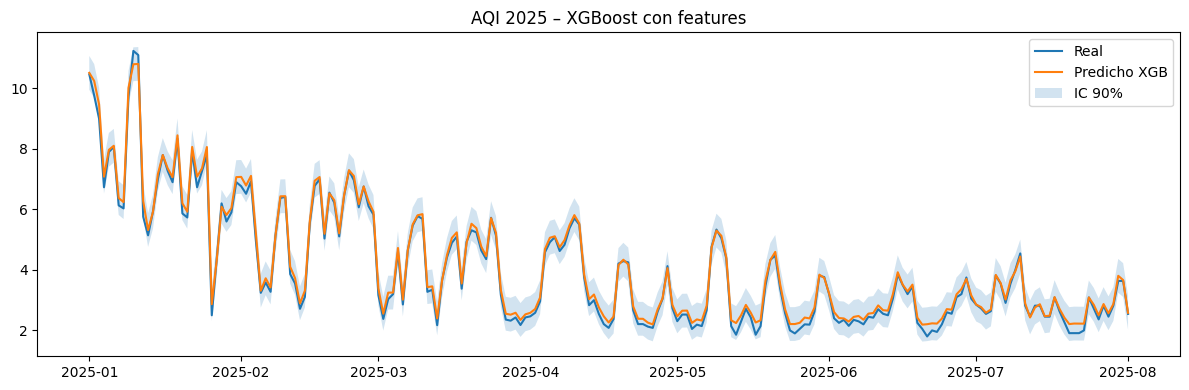

In [21]:
DATA_2324 = "promedio_diario_2023_2024.csv"
DATA_2025 = "promedio_diario_2025.csv"

# Utilidades
def rmse(a, b):
    a = pd.Series(a); b = pd.Series(b)
    m = a.notna() & b.notna() & np.isfinite(a) & np.isfinite(b)
    return float(np.sqrt(sk_mse(a[m], b[m])))

def load_df(path):
    df = pd.read_csv(path)
    df.columns = [c.strip() for c in df.columns]
    for c in ["Year","Month","Day"]:
        df[c] = df[c].astype(int)
    df["Date"] = pd.to_datetime(df[["Year","Month","Day"]], errors="coerce")
    df = df.sort_values("Date").reset_index(drop=True)
    if "ObsCount_total" not in df.columns:
        for alt in ["ObsCount", "ObsCount_sum", "ObsCountTotal"]:
            if alt in df.columns:
                df = df.rename(columns={alt:"ObsCount_total"})
                break
    return df

def add_time_features(tmp):
    out = tmp.copy()
    # lags AQI
    for L in [1,2,3,7,14,21,28,35]:
        out[f"AQI_lag{L}"] = out["AQI_mean"].shift(L)
    # rolling AQI
    out["AQI_ma7"]  = out["AQI_mean"].rolling(7).mean()
    out["AQI_ma14"] = out["AQI_mean"].rolling(14).mean()
    out["AQI_ma28"] = out["AQI_mean"].rolling(28).mean()
    # exógenas (si existen)
    if "CO_mean" in out.columns:
        for L in [1,7]:
            out[f"CO_lag{L}"] = out["CO_mean"].shift(L)
        out["CO_ma7"] = out["CO_mean"].rolling(7).mean()
    if "ObsCount_total" in out.columns:
        out["Obs_ma7"] = out["ObsCount_total"].rolling(7).mean()
    # calendario
    out["dow"]   = out["Date"].dt.weekday
    out["month"] = out["Date"].dt.month
    for d in range(7):
        out[f"dow_{d}"] = (out["dow"]==d).astype(int)
    for mth in range(1,13):
        out[f"m_{mth}"] = (out["month"]==mth).astype(int)
    # fourier semanal + tendencia
    t = np.arange(len(out))
    out["sin7"] = np.sin(2*np.pi*t/7); out["cos7"] = np.cos(2*np.pi*t/7)
    out["t"] = t
    return out

# Cargar 2023–2024
df = load_df(DATA_2324)
df = add_time_features(df)
df_ml = df.dropna().reset_index(drop=True)  # quitar NaN de lags/rollings

y = df_ml["AQI_mean"].values
feat_cols = [c for c in df_ml.columns if c not in ["AQI_mean","Date","Year","Month","Day"]]
X = df_ml[feat_cols].values
dates = df_ml["Date"].values

# Backtesting expanding-window
def expanding_splits(n, n_splits=5, min_train=180):
    # genera índices (train_idx, test_idx) con ventana creciente y test ~igual tamaño
    fold_size = (n - min_train) // n_splits
    for k in range(n_splits):
        start_tr = 0
        end_tr   = min_train + k*fold_size
        start_te = end_tr
        end_te   = min(n, end_tr + fold_size)
        if end_te - start_te < 14:  # evita tests demasiado pequeños
            break
        yield np.arange(start_tr, end_tr), np.arange(start_te, end_te)

param_grid = [
    {"n_estimators": 600, "learning_rate": 0.05, "max_depth": 4, "subsample": 0.9, "colsample_bytree": 0.9, "reg_lambda": 1.0},
    {"n_estimators": 800, "learning_rate": 0.06, "max_depth": 5, "subsample": 0.9, "colsample_bytree": 0.9, "reg_lambda": 1.0},
    {"n_estimators":1000, "learning_rate": 0.08, "max_depth": 5, "subsample": 0.8, "colsample_bytree": 0.8, "reg_lambda": 1.5},
    {"n_estimators": 800, "learning_rate": 0.04, "max_depth": 6, "subsample": 0.9, "colsample_bytree": 0.9, "reg_lambda": 0.8},
]

best_score, best_params = np.inf, None
for params in param_grid:
    rmses, maes = [], []
    for tr, te in expanding_splits(len(X), n_splits=5, min_train=180):
        model = XGBRegressor(
            objective="reg:squarederror",
            n_estimators=params["n_estimators"],
            learning_rate=params["learning_rate"],
            max_depth=params["max_depth"],
            subsample=params["subsample"],
            colsample_bytree=params["colsample_bytree"],
            reg_lambda=params["reg_lambda"],
            random_state=42, n_jobs=-1
        )
        model.fit(X[tr], y[tr])
        p = model.predict(X[te])
        rmses.append(np.sqrt(sk_mse(y[te], p)))
        maes.append(sk_mae(y[te], p))
    score = float(np.mean(rmses))
    print(f"Grid {params} -> RMSE {np.mean(rmses):.3f} ± {np.std(rmses):.3f} | MAE {np.mean(maes):.3f}")
    if score < best_score:
        best_score, best_params = score, params.copy()

print(f"\nMejores params: {best_params} | RMSE CV≈ {best_score:.3f}")

#  Entrena final con 2023–2024
best_model = XGBRegressor(objective="reg:squarederror", random_state=42, n_jobs=-1, **best_params)
best_model.fit(X, y)

# Pronóstico 2025 (recursivo)
try:
    df25 = load_df(DATA_2025)[["Year","Month","Day","Date","AQI_mean","CO_mean","ObsCount_total"]]
except Exception:
    idx25 = pd.date_range("2025-01-01","2025-12-31", freq="D")
    df25 = pd.DataFrame({"Date": idx25})
    df25["Year"]=df25["Date"].dt.year; df25["Month"]=df25["Date"].dt.month; df25["Day"]=df25["Date"].dt.day
    df25["AQI_mean"]=np.nan; df25["CO_mean"]=np.nan; df25["ObsCount_total"]=np.nan

hist = df.copy()               # arranca con 2023–2024 (con features hechos)
preds = []
for d in df25["Date"]:
    row = {"Date": d, "Year": d.year, "Month": d.month, "Day": d.day, "AQI_mean": np.nan}
    # exógenas 2025 si existen, si no, backfill con media de los últimos 7 días
    for col in ["CO_mean","ObsCount_total"]:
        if col in df25.columns and pd.notna(df25.loc[df25["Date"]==d, col]).any():
            row[col] = float(df25.loc[df25["Date"]==d, col].values[0])
        elif col in hist.columns:
            row[col] = float(hist[col].iloc[-7:].mean())
    hist = pd.concat([hist, pd.DataFrame([row])], ignore_index=True)
    tmp  = add_time_features(hist).iloc[-1:]
    tmpX = tmp.drop(columns=["AQI_mean","Date","Year","Month","Day"]).values
    yhat = float(best_model.predict(tmpX)[0])
    preds.append(yhat)
    hist.at[hist.index[-1], "AQI_mean"] = yhat  # retroalimentar para lags

out = df25.copy()
out["AQI_pred"] = preds

# Intervalos conformales (90%)
# calibración con walk-forward en los últimos 90 días de 2024
cal_days = 90
cal = df.tail(cal_days + 35).copy()  # +35 para tener lags
cal_preds, cal_trues = [], []
for i in range(35, len(cal)):  # desde que hay lags
    tr = cal.iloc[:i].dropna()
    Xtr = add_time_features(tr).dropna()
    ytr = Xtr["AQI_mean"].values
    XtrM = Xtr.drop(columns=["AQI_mean","Date","Year","Month","Day"]).values
    mdl = XGBRegressor(objective="reg:squarederror", random_state=42, n_jobs=-1, **best_params)
    mdl.fit(XtrM, ytr)
    # pred para el siguiente punto (usando lags reales hasta t-1)
    xt1 = add_time_features(cal.iloc[:i+1]).iloc[-1:]
    xt1M = xt1.drop(columns=["AQI_mean","Date","Year","Month","Day"]).values
    cal_preds.append(float(mdl.predict(xt1M)[0]))
    cal_trues.append(float(cal.iloc[i]["AQI_mean"]))
resid = np.abs(np.array(cal_trues) - np.array(cal_preds))
q = np.quantile(resid, 0.90)  # 90% => alpha=0.10 → percentil 90 de |resid|

out["CI_lower"] = np.clip(out["AQI_pred"] - q, 0, None)
out["CI_upper"] = out["AQI_pred"] + q

# Evaluación 2025 si hay reales
if out["AQI_mean"].notna().any():
    mask = out["AQI_mean"].notna() & np.isfinite(out["AQI_pred"])
    rmse_25 = rmse(out.loc[mask,"AQI_mean"], out.loc[mask,"AQI_pred"])
    mae_25  = sk_mae(out.loc[mask,"AQI_mean"], out.loc[mask,"AQI_pred"])
    print(f"\n2025: RMSE {rmse_25:.3f} | MAE {mae_25:.3f}")

# Guardar + plot
out[["Year","Month","Day","AQI_pred","CI_lower","CI_upper"]].to_csv("AQI_forecast_2025_XGB.csv", index=False)
print("✔ Guardado: AQI_forecast_2025_XGB.csv")

plt.figure(figsize=(12,4))
if out["AQI_mean"].notna().any():
    plt.plot(out["Date"], out["AQI_mean"], label="Real")
plt.plot(out["Date"], out["AQI_pred"], label="Predicho XGB")
plt.fill_between(out["Date"], out["CI_lower"], out["CI_upper"], alpha=0.2, label="IC 90%")
plt.title("AQI 2025 – XGBoost con features"); plt.legend(); plt.tight_layout(); plt.show()